# Self response absolute and zero correlation model

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
days = ['07','08','09','10','11']
tau_val = 1000
t_step = 100

In [19]:
def self_response_abs_zero_corr_plot(ticker_i, days, t_step):
    plt.figure(figsize=(9,16))
    plt.subplots_adjust(hspace = 0, wspace = 0)

    for d, day in enumerate(days):
        self = pickle.load(open('../Data/self_response_abs_data_{}ms/self_abs_201603{}_{}i_{}ms.pickl'
                                .format(t_step, day, ticker_i, t_step), 'rb'))
        zero = pickle.load(open('../Data/zero_correlation_data_{}ms/zero_correlation_201603{}_{}i_rand_{}ms.pickl'
                                .format(t_step, day, ticker_i, t_step), 'rb'))
        resp = pickle.load(open('../Data/cross_response_functions_data_{}ms/cross_201603{}_{}i_{}j.pickl'
                                .format(t_step, day, ticker_i, ticker_i, t_step), 'rb'))  

        plt.subplot(5,1,d+1)
        plt.semilogx(self, '-', label='Self response abs Stock i {} - {}'.format(ticker_i, day))
        plt.semilogx(zero, '-', label='Zero correlation Stock i {} - {}'.format(ticker_i, day))
        plt.semilogx(resp, '-', label='Self response Stock i {} - {}'.format(ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response $ R_{ii} (\tau) $')
        plt.ylim(-1e-5, 1e-5)
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True)
        plt.tight_layout()

    #plt.savefig('self_response_abs_zero_corr_{}_{}ms.png'.format(ticker_i, t_step))

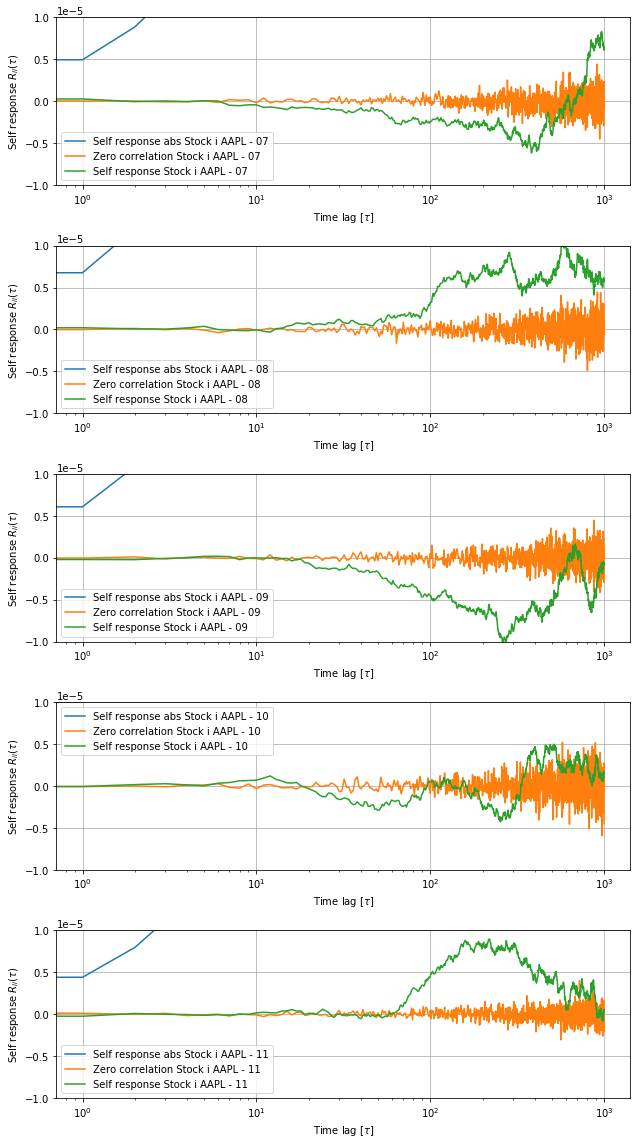

In [20]:
self_response_abs_zero_corr_plot(ticker_i, days, t_step)